In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# from keras import backend as K

In [2]:
csv = pd.read_csv("../../dataset/train_set.csv")
class_labels = csv.columns

In [3]:
m1_cce_loss = np.load("losses/multipleModels/model_mean_part_class_mult_cce_loss.npy")
m1_sal_loss = np.load("losses/multipleModels/model_mean_part_class_mult_sal_loss.npy")

In [4]:
m2_cce_loss = np.load("losses/multipleModels/model_max_part_sal_mult_cce_loss.npy")
m2_sal_loss = np.load("losses/multipleModels/model_max_part_sal_mult_sal_loss.npy")


In [5]:
m3_cce_loss = np.load("losses/multipleModels/model_softmax_part_class_ibeta_100_mult_cce_loss.npy")
m3_sal_loss = np.load("losses/multipleModels/model_softmax_part_class_ibeta_100_mult_sal_loss.npy")

In [6]:
m4_cce_loss = np.load("losses/multipleModels/model_softmax_part_schedule_0.01_mult_cce_loss.npy")
m4_sal_loss = np.load("losses/multipleModels/model_softmax_part_schedule_0.01_mult_sal_loss.npy")

In [7]:
def running_min(arr, init=np.inf):
    curr_min = init
    arr_new = np.zeros(arr.shape)
    for i in range(len(arr)):
        curr_min = min(curr_min, arr[i])
        arr_new[i] = curr_min
    return arr_new

In [8]:
cce_cce_mean = np.mean(m1_cce_loss, axis=0)
sal_cce_mean = np.mean(m2_cce_loss, axis=0)
mix_cce_mean = np.mean(m3_cce_loss, axis=0)
m4_cce_mean = np.mean(m4_cce_loss, axis=0)

cce_sal_mean = np.mean(m1_sal_loss, axis=0)
sal_sal_mean = np.mean(m2_sal_loss, axis=0)
mix_sal_mean = np.mean(m3_sal_loss, axis=0)
m4_sal_mean = np.mean(m4_sal_loss, axis=0)


In [9]:
min(m4_cce_mean)

0.11011388808488846

In [10]:
min(np.mean(np.load("losses/multipleModels/model_softmax_part_schedule_0.02_mult_cce_loss.npy"), axis=0))

0.11534449487924577

In [11]:
skip = 10

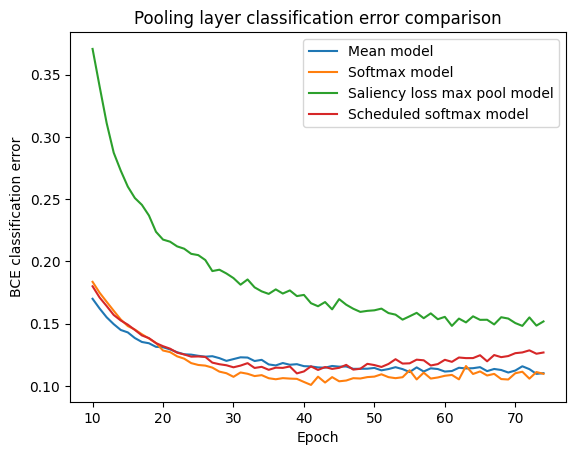

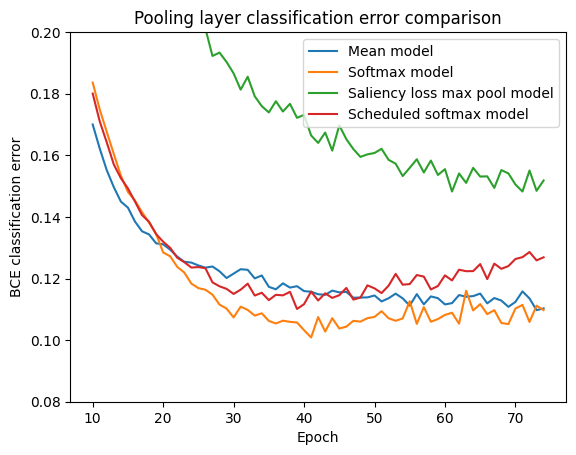

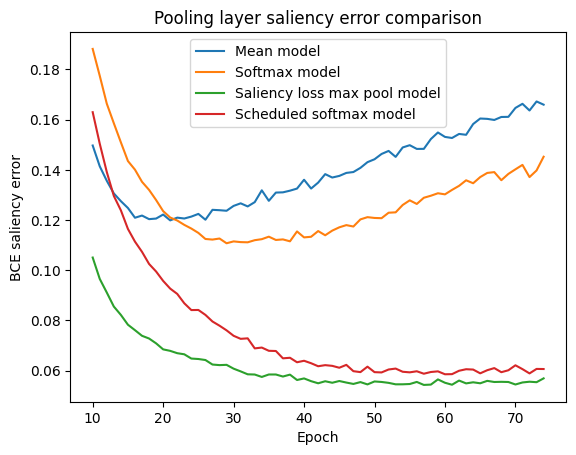

In [12]:
plt.plot(np.arange(skip, len(cce_cce_mean)), cce_cce_mean[skip:], label="Mean model")
plt.plot(np.arange(skip, len(cce_cce_mean)), mix_cce_mean[skip:], label="Softmax model")
plt.plot(np.arange(skip, len(cce_cce_mean)), sal_cce_mean[skip:], label="Saliency loss max pool model")
plt.plot(np.arange(skip, len(cce_cce_mean)), m4_cce_mean[skip:], label="Scheduled softmax model")
plt.title("Pooling layer classification error comparison")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()
plt.plot(np.arange(skip, len(cce_cce_mean)), cce_cce_mean[skip:], label="Mean model")
plt.plot(np.arange(skip, len(cce_cce_mean)), mix_cce_mean[skip:], label="Softmax model")
plt.plot(np.arange(skip, len(cce_cce_mean)), sal_cce_mean[skip:], label="Saliency loss max pool model")
plt.plot(np.arange(skip, len(cce_cce_mean)), m4_cce_mean[skip:], label="Scheduled softmax model")
plt.ylim([0.08, 0.20])
plt.title("Pooling layer classification error comparison")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()
plt.plot(np.arange(skip, len(cce_cce_mean)), cce_sal_mean[skip:], label="Mean model")
plt.plot(np.arange(skip, len(cce_cce_mean)), mix_sal_mean[skip:], label="Softmax model")
plt.plot(np.arange(skip, len(cce_cce_mean)), sal_sal_mean[skip:], label="Saliency loss max pool model")
plt.plot(np.arange(skip, len(cce_cce_mean)), m4_sal_mean[skip:], label="Scheduled softmax model")
plt.title("Pooling layer saliency error comparison")
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [13]:
cce_cce_min = np.mean([running_min(a) for a in m1_cce_loss], axis=0)
sal_cce_min = np.mean([running_min(a) for a in m2_cce_loss], axis=0)
mix_cce_min = np.mean([running_min(a) for a in m3_cce_loss], axis=0)

In [14]:
cce_cce_min.shape

(75,)

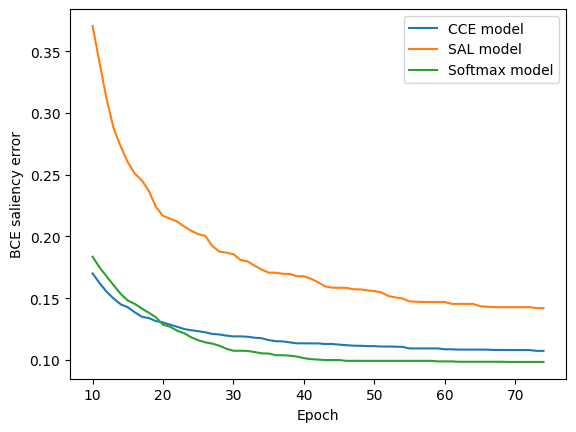

In [15]:
plt.plot(np.arange(skip, len(cce_cce_mean)), cce_cce_min[skip:], label="CCE model")
plt.plot(np.arange(skip, len(cce_cce_mean)), sal_cce_min[skip:], label="SAL model")
plt.plot(np.arange(skip, len(cce_cce_mean)), mix_cce_min[skip:], label="Softmax model")
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [16]:
skip = 10
models_ibeta = ["1", "10", "32", "100", "320"]
ibeta_cce = [np.load(f"losses/multipleModels/model_softmax_part_class_ibeta_{beta}_mult_cce_loss.npy") for beta in models_ibeta]
ibeta_sal = [np.load(f"losses/multipleModels/model_softmax_part_class_ibeta_{beta}_mult_sal_loss.npy") for beta in models_ibeta]
ibeta_cce_mean = [np.mean(loss, axis=0) for loss in ibeta_cce]
ibeta_sal_mean = [np.mean(loss, axis=0) for loss in ibeta_sal]

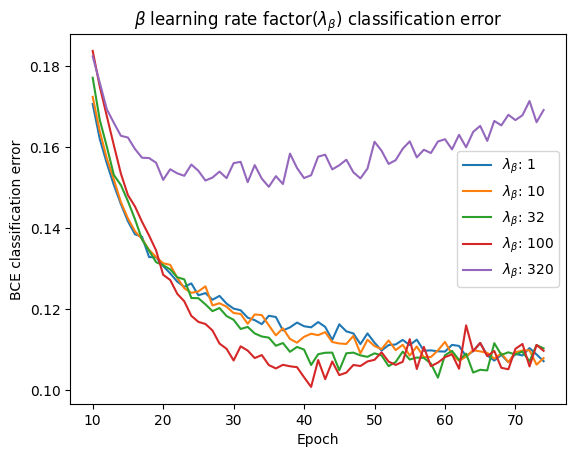

In [17]:
for idx, ibeta in enumerate(models_ibeta):
    plt.plot(np.arange(skip, len(ibeta_cce_mean[idx])), ibeta_cce_mean[idx][skip:], label=r"$\lambda_\beta$: " + ibeta)
plt.title(r"$\beta$ learning rate factor($\lambda_\beta$) classification error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

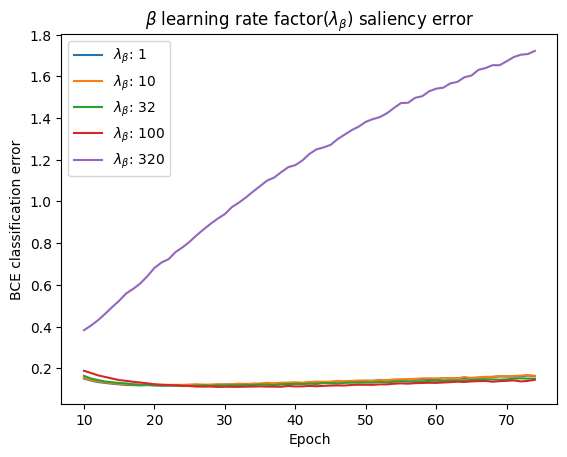

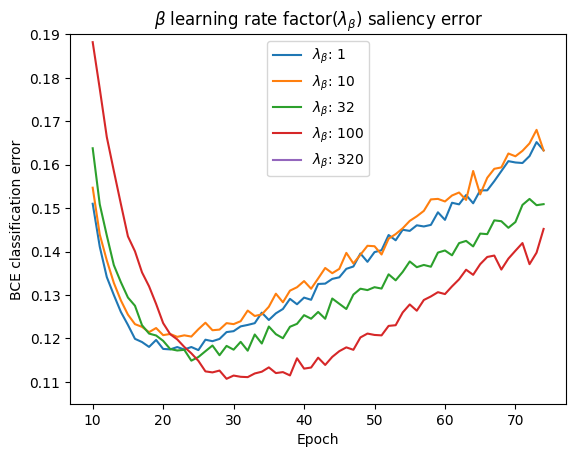

In [18]:
for idx, ibeta in enumerate(models_ibeta):
    plt.plot(np.arange(skip, len(ibeta_sal_mean[idx])), ibeta_sal_mean[idx][skip:], label=r"$\lambda_\beta$: " + ibeta)
plt.title(r"$\beta$ learning rate factor($\lambda_\beta$) saliency error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()
plt.show()
for idx, ibeta in enumerate(models_ibeta):
    plt.plot(np.arange(skip, len(ibeta_sal_mean[idx])), ibeta_sal_mean[idx][skip:], label=r"$\lambda_\beta$: " + ibeta)
plt.ylim([0.105, 0.19])
plt.title(r"$\beta$ learning rate factor($\lambda_\beta$) saliency error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [19]:
skip=10
models_alpha = ["0.25", "0.5", "0.75", "0.9", "0.95"]
alpha_cce = [np.load(f"losses/multipleModels/model_softmax_part_class_alpha_{alpha}_mult_cce_loss.npy") for alpha in models_alpha] + [np.load("losses/multipleModels/model_softmax_part_class_ibeta_100_mult_cce_loss.npy")]
alpha_sal = [np.load(f"losses/multipleModels/model_softmax_part_class_alpha_{alpha}_mult_sal_loss.npy") for alpha in models_alpha] + [np.load("losses/multipleModels/model_softmax_part_class_ibeta_100_mult_sal_loss.npy")]
alpha_cce_mean = [np.mean(loss, axis=0) for loss in alpha_cce]
alpha_sal_mean = [np.mean(loss, axis=0) for loss in alpha_sal]
models_alpha.append("1.0")

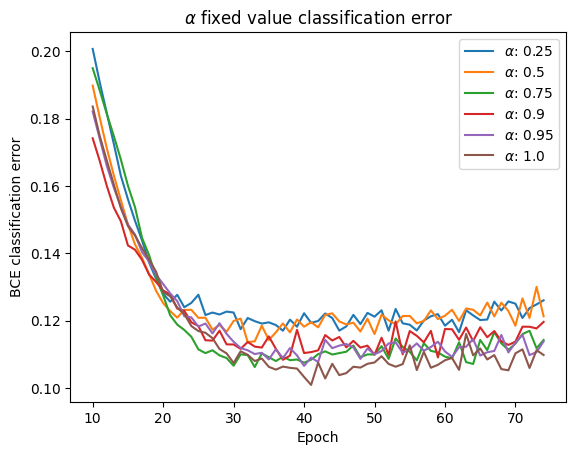

In [20]:
for idx, alpha in enumerate(models_alpha):
    plt.plot(np.arange(skip, len(alpha_cce_mean[idx])), alpha_cce_mean[idx][skip:], label=r"$\alpha$: " + alpha)
plt.title(r"$\alpha$ fixed value classification error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

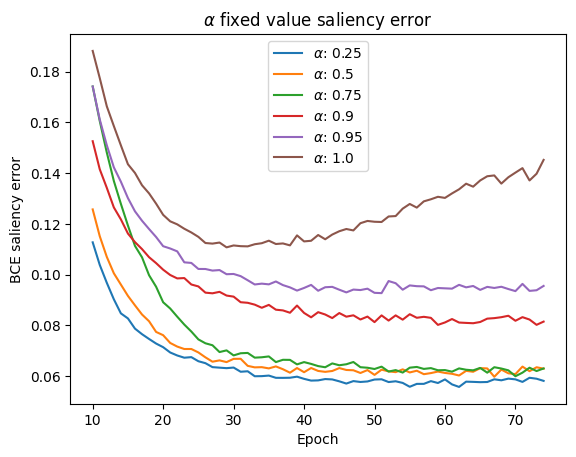

In [21]:
for idx, alpha in enumerate(models_alpha):
    plt.plot(np.arange(skip, len(alpha_sal_mean[idx])), alpha_sal_mean[idx][skip:], label=r"$\alpha$: " + alpha)
plt.title(r"$\alpha$ fixed value saliency error")
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [48]:
skip=10
models_schedule = ["0.04", "0.02", "0.01",  "0.005"] #, ]
schedule_cce = [np.load(f"losses/multipleModels/model_softmax_part_schedule_{schedule}_mult_cce_loss.npy") for schedule in models_schedule] + [np.load("losses/multipleModels/model_softmax_part_class_ibeta_100_mult_cce_loss.npy")]
schedule_sal = [np.load(f"losses/multipleModels/model_softmax_part_schedule_{schedule}_mult_sal_loss.npy") for schedule in models_schedule] + [np.load("losses/multipleModels/model_softmax_part_class_ibeta_100_mult_sal_loss.npy")]
schedule_cce_mean = [np.mean(loss, axis=0) for loss in schedule_cce]
schedule_sal_mean = [np.mean(loss, axis=0) for loss in schedule_sal]
models_schedule.append("0.0")

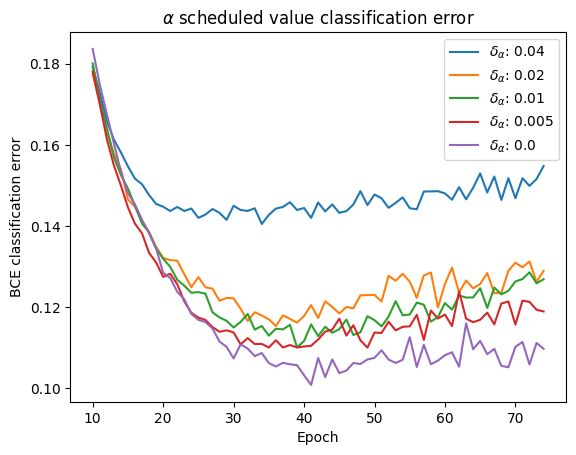

In [49]:
for idx, schedule in enumerate(models_schedule):
    plt.plot(np.arange(skip, len(schedule_cce_mean[idx])), schedule_cce_mean[idx][skip:], label=r"$\delta_\alpha$: " + schedule)
plt.title(r"$\alpha$ scheduled value classification error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

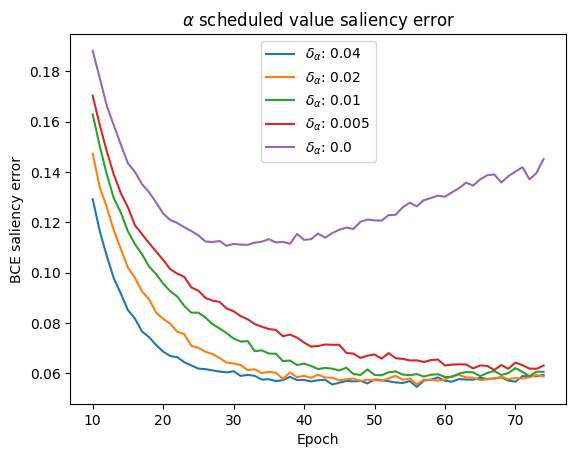

In [51]:
for idx, schedule in enumerate(models_schedule):
    plt.plot(np.arange(skip, len(schedule_sal_mean[idx])), schedule_sal_mean[idx][skip:], label=r"$\delta_\alpha$: " + schedule)
plt.title(r"$\alpha$ scheduled value saliency error")
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [25]:
skip=10
models_pool_schedule = ["softmax pooling", "mean pooling"]
pool_schedule_cce = [np.load(f"losses/multipleModels/model_softmax_part_schedule_0.01_mult_cce_loss.npy"), np.load("losses/multipleModels/model_mean_part_schedule_0.01_mult_cce_loss.npy")]
pool_schedule_sal = [np.load(f"losses/multipleModels/model_softmax_part_schedule_0.01_mult_sal_loss.npy"), np.load("losses/multipleModels/model_mean_part_schedule_0.01_mult_sal_loss.npy")]
pool_schedule_cce_mean = [np.mean(loss, axis=0) for loss in pool_schedule_cce]
pool_schedule_sal_mean = [np.mean(loss, axis=0) for loss in pool_schedule_sal]

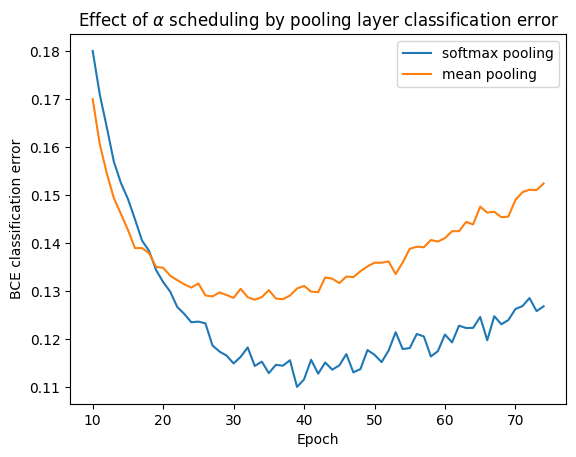

In [26]:
for idx, schedule in enumerate(models_pool_schedule):
    plt.plot(np.arange(skip, len(pool_schedule_cce_mean[idx])), pool_schedule_cce_mean[idx][skip:], label=r"" + schedule)
plt.title(r"Effect of $\alpha$ scheduling by pooling layer classification error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

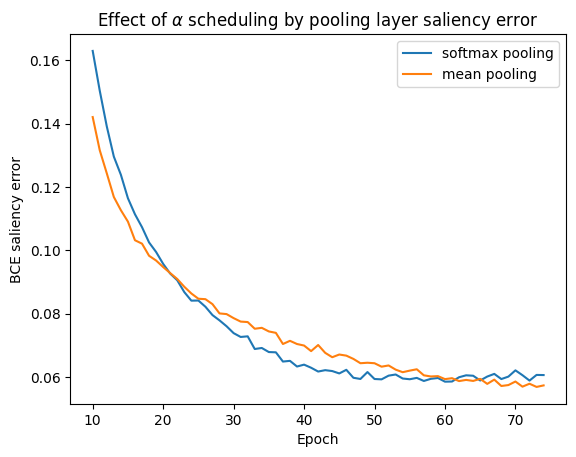

In [27]:
for idx, schedule in enumerate(models_pool_schedule):
    plt.plot(np.arange(skip, len(pool_schedule_sal_mean[idx])), pool_schedule_sal_mean[idx][skip:], label=r"" + schedule)
plt.title(r"Effect of $\alpha$ scheduling by pooling layer saliency error")
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

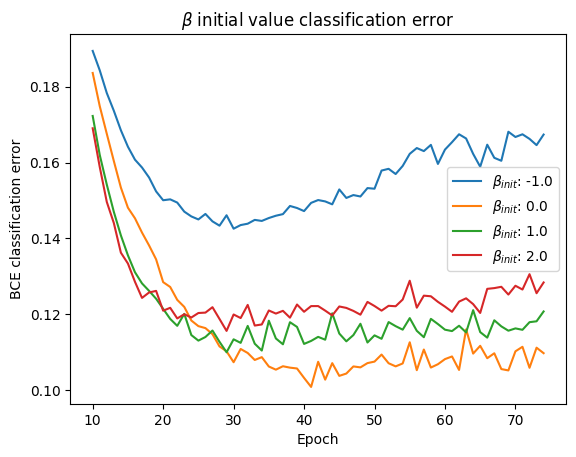

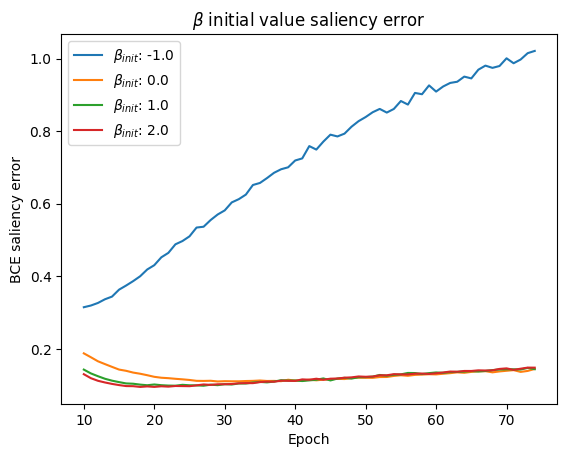

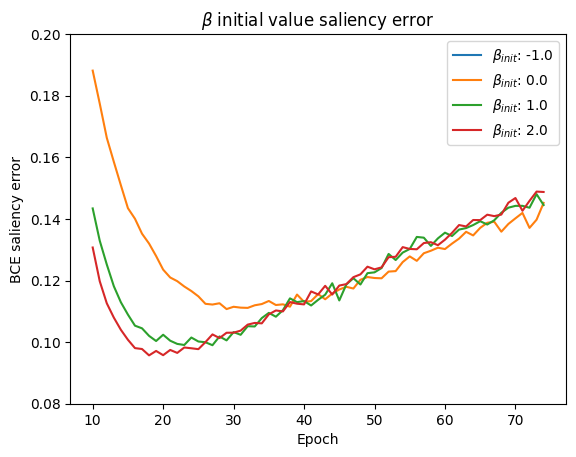

In [28]:
skip = 10
models_beta_start = ["-1.0", "0.0", "1.0", "2.0"]  #, ]
beta_start_cce = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_start_{start}_mult_cce_loss.npy") for start
                in models_beta_start]
beta_start_sal = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_start_{start}_mult_sal_loss.npy") for start
                in models_beta_start]
beta_start_cce_mean = [np.mean(loss, axis=0) for loss in beta_start_cce]
beta_start_sal_mean = [np.mean(loss, axis=0) for loss in beta_start_sal]

for idx, start in enumerate(models_beta_start):
    plt.plot(np.arange(skip, len(beta_start_cce_mean[idx])), beta_start_cce_mean[idx][skip:],
             label=r"$\beta_{init}$: " + start)
plt.title(r"$\beta$ initial value classification error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()
for idx, start in enumerate(models_beta_start):
    plt.plot(np.arange(skip, len(beta_start_sal_mean[idx])), beta_start_sal_mean[idx][skip:],
             label=r"$\beta_{init}$: " + start)
plt.title(r"$\beta$ initial value saliency error")
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()
for idx, start in enumerate(models_beta_start):
    plt.plot(np.arange(skip, len(beta_start_sal_mean[idx])), beta_start_sal_mean[idx][skip:],
             label=r"$\beta_{init}$: " + start)
plt.title(r"$\beta$ initial value saliency error")
plt.ylim([0.08, 0.2])
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

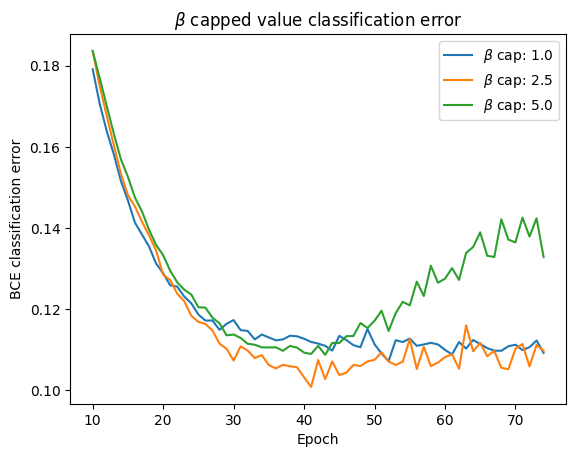

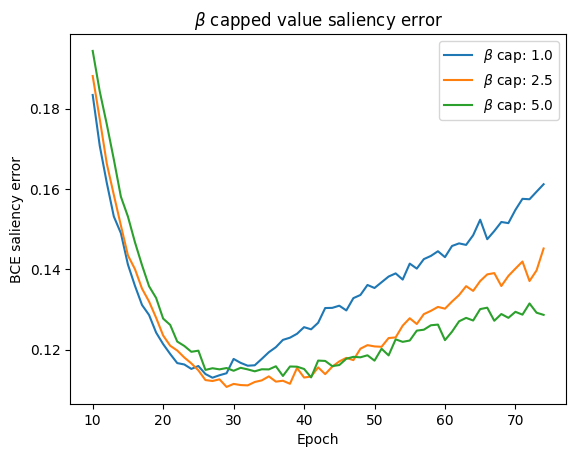

In [29]:
skip = 10
models_beta_cap = ["1.0", "2.5", "5.0"]  #, ]
beta_cap_cce = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_cap_{cap}_mult_cce_loss.npy") for cap
                  in models_beta_cap]
beta_cap_sal = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_cap_{cap}_mult_sal_loss.npy") for cap
                  in models_beta_cap]
beta_cap_cce_mean = [np.mean(loss, axis=0) for loss in beta_cap_cce]
beta_cap_sal_mean = [np.mean(loss, axis=0) for loss in beta_cap_sal]

for idx, start in enumerate(models_beta_cap):
    plt.plot(np.arange(skip, len(beta_cap_cce_mean[idx])), beta_cap_cce_mean[idx][skip:],
             label=r"$\beta$ cap: " + start)
plt.title(r"$\beta$ capped value classification error")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()
for idx, start in enumerate(models_beta_cap):
    plt.plot(np.arange(skip, len(beta_cap_sal_mean[idx])), beta_cap_sal_mean[idx][skip:],
             label=r"$\beta$ cap: " + start)
plt.title(r"$\beta$ capped value saliency error")
plt.ylabel("BCE saliency error")
plt.xlabel("Epoch")
plt.legend()
plt.show()

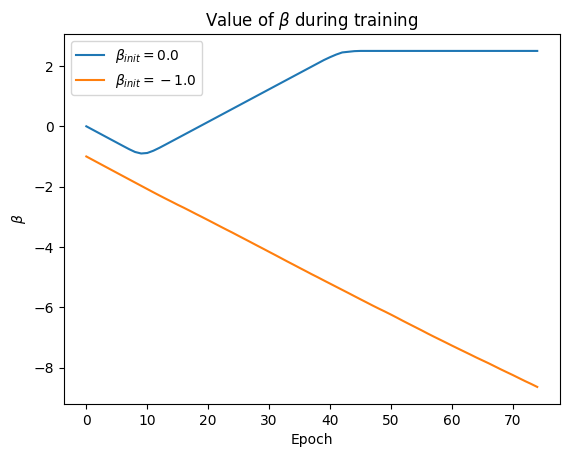

In [30]:

bet_val_po = np.load("beta_values/model_softmax_part_class_beta_obs_pos_mult_beta_values.npy")
bet_val_neg = np.load("beta_values/model_softmax_part_class_beta_neg_pos_mult_beta_values.npy")
plt.plot(np.mean(bet_val_po, axis=0), label=r"$\beta_{init} = 0.0$")
plt.plot(np.mean(bet_val_neg, axis=0), label=r"$\beta_{init} = -1.0$")
plt.title(r"Value of $\beta$ during training")
plt.ylabel(r"$\beta$")
plt.xlabel("Epoch")
plt.legend()
plt.show()


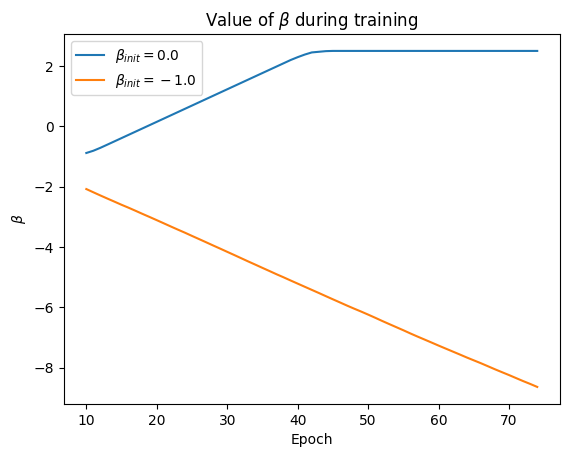

In [31]:
skip = 10
bet_val_po = np.load("beta_values/model_softmax_part_class_beta_obs_pos_mult_beta_values.npy")
bet_val_neg = np.load("beta_values/model_softmax_part_class_beta_neg_pos_mult_beta_values.npy")
plt.plot(np.arange(skip, len(bet_val_po[0])), np.mean(bet_val_po, axis=0)[skip:], label=r"$\beta_{init} = 0.0$")
plt.plot(np.arange(skip, len(bet_val_neg[0])), np.mean(bet_val_neg, axis=0)[skip:], label=r"$\beta_{init} = -1.0$")
plt.title(r"Value of $\beta$ during training")
plt.ylabel(r"$\beta$")
plt.xlabel("Epoch")
plt.legend()
plt.show()

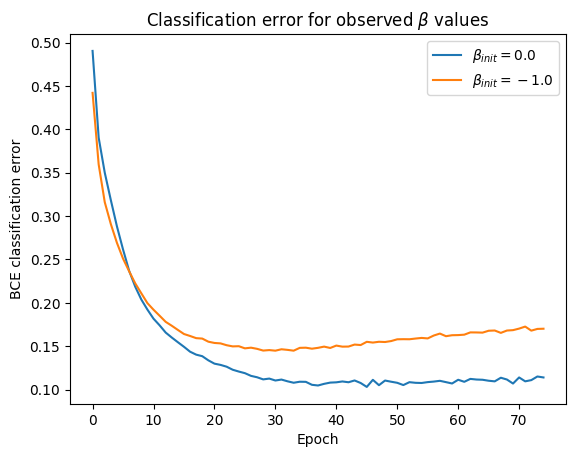

In [32]:
skip = 0
models_beta_val = [r"$\beta_{init} = 0.0$", r"$\beta_{init} = -1.0$"]
beta_val_cce = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_obs_pos_mult_cce_loss.npy"), np.load("losses/multipleModels/model_softmax_part_class_beta_neg_pos_mult_cce_loss.npy")]
# beta_val_sal = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_obs_pos_mult_sal_loss.npy"), np.load("losses/multipleModels/model_softmax_part_class_beta_obs_neg_mult_sal_loss.npy")]
beta_val_cce_mean = [np.mean(loss, axis=0) for loss in beta_val_cce]
# beta_val_sal_mean = [np.mean(loss, axis=0) for loss in beta_cap_sal]

for idx, start in enumerate(models_beta_val):
    plt.plot(np.arange(skip, len(beta_val_cce_mean[idx])), beta_val_cce_mean[idx][skip:],
             label=r"" + start)
plt.title(r"Classification error for observed $\beta$ values")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.legend()
plt.show()
# for idx, start in enumerate(models_beta_val):
#     plt.plot(np.arange(skip, len(beta_val_sal_mean[idx])), beta_val_sal_mean[idx][skip:],
#              label=r"" + start)
# plt.title(r"Saliency error for observed $beta$ values")
# plt.ylabel("BCE saliency error")
# plt.xlabel("Epoch")
# plt.legend()
# plt.show()

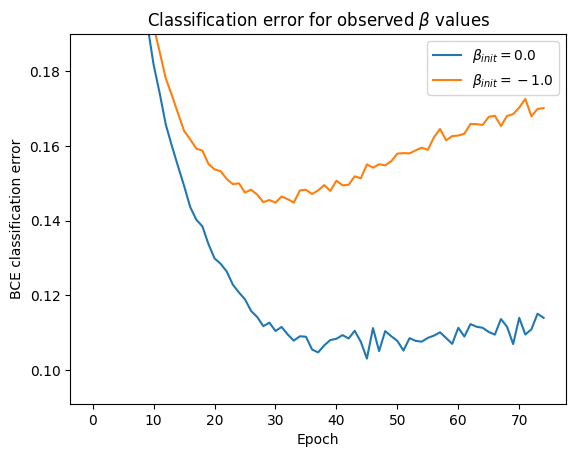

In [33]:
skip = 0
models_beta_val = [r"$\beta_{init} = 0.0$", r"$\beta_{init} = -1.0$"]
beta_val_cce = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_obs_pos_mult_cce_loss.npy"), np.load("losses/multipleModels/model_softmax_part_class_beta_neg_pos_mult_cce_loss.npy")]
# beta_val_sal = [np.load(f"losses/multipleModels/model_softmax_part_class_beta_obs_pos_mult_sal_loss.npy"), np.load("losses/multipleModels/model_softmax_part_class_beta_obs_neg_mult_sal_loss.npy")]
beta_val_cce_mean = [np.mean(loss, axis=0) for loss in beta_val_cce]
# beta_val_sal_mean = [np.mean(loss, axis=0) for loss in beta_cap_sal]

for idx, start in enumerate(models_beta_val):
    plt.plot(np.arange(skip, len(beta_val_cce_mean[idx])), beta_val_cce_mean[idx][skip:],
             label=r"" + start)
plt.title(r"Classification error for observed $\beta$ values")
plt.ylabel("BCE classification error")
plt.xlabel("Epoch")
plt.ylim([0.091, 0.19])
plt.legend()
plt.show()

In [34]:
np.mean(bet_val_po, axis=0).shape

(75,)

In [35]:
bet_val_po[1]

array([ 0.        , -0.10853163, -0.2168802 , -0.32512039, -0.43328479,
       -0.54135525, -0.64931804, -0.75716352, -0.8648901 , -0.96748412,
       -1.03994572, -1.0471133 , -0.97941875, -0.87691855, -0.76934856,
       -0.66169989, -0.55401063, -0.446282  , -0.3385098 , -0.23070574,
       -0.12286954, -0.01500547,  0.09287941,  0.20077103,  0.30867198,
        0.41658357,  0.52450526,  0.63241589,  0.74032664,  0.84823412,
        0.95613104,  1.06402314,  1.17190039,  1.27975249,  1.38759232,
        1.49541342,  1.6032207 ,  1.71101153,  1.81878459,  1.92653382,
        2.03426433,  2.14197326,  2.24965429,  2.35732627,  2.46494961,
        2.5       ,  2.5       ,  2.5       ,  2.5       ,  2.5       ,
        2.5       ,  2.5       ,  2.5       ,  2.5       ,  2.5       ,
        2.5       ,  2.5       ,  2.5       ,  2.5       ,  2.5       ,
        2.5       ,  2.5       ,  2.5       ,  2.5       ,  2.5       ,
        2.5       ,  2.5       ,  2.5       ,  2.5       ,  2.5 

In [36]:
cce_pred = np.load("losses/multipleModels/model_cce_mobile_21k_150_epoch_predictions.npy")
sal_pred = np.load("losses/multipleModels/model_sal_mobile_21k_150_epoch_predictions.npy")

In [37]:
cce_pred.shape

(4, 120, 75, 20, 2)

In [38]:
pred_class = 14
print(class_labels[pred_class + 1])
print(sum(csv[class_labels[pred_class + 1]][675:]))

person
20


In [39]:
np.sum(cce_pred[0,0,:,pred_class,1])

20.0

In [40]:
bike_cce = cce_pred[:,:,:,pred_class,:]
bike_sal = sal_pred[:,:,:,pred_class,:]

In [41]:
bike_cce.shape

(4, 120, 75, 2)

In [42]:
sum(bike_cce[0,0,:,1])

20.0

In [43]:
np.sum(bike_cce[0,0,:,1])

20.0

In [44]:
tf_bike_cce = (bike_cce[:,:,:,1] == 1.0)
bike_only_cce = np.reshape(bike_cce[tf_bike_cce], (4,120,20,2))
tf_bike_sal = (bike_sal[:,:,:,1] == 1.0)
bike_only_sal = np.reshape(bike_sal[tf_bike_sal], (4,120,20,2))

In [45]:
def get_cce_error(arr):
    predicted = arr[:,:,:,0]
    real = arr[:,:,:,1]
    print(np.mean(predicted, axis = 2))
    # Compute log of predicted probabilities and element-wise product with real values
    epsilon = 1e-10  # Small value to prevent log(0)
    predicted_clipped = np.clip(predicted, epsilon, 1 - epsilon)
    cross_entropy = -real * np.log(predicted_clipped)

    # Take the mean along the first and third dimensions
    result = np.mean(cross_entropy, axis=(0, 2))
    return result

In [46]:
get_cce_error(bike_only_sal)

[[0.97808    0.98310834 0.9815561  0.9942316  0.99353564 0.99739283
  0.9956835  0.99408895 0.99062955 0.9696352  0.93150246 0.8516048
  0.8639386  0.82989246 0.8124758  0.7116884  0.7362257  0.73706084
  0.7413197  0.68576324 0.74960583 0.6652305  0.74049425 0.6505158
  0.6781083  0.66358685 0.675956   0.7157712  0.6400613  0.64098096
  0.6499231  0.71310216 0.6379     0.6885622  0.6888648  0.68596566
  0.722521   0.65216887 0.70413834 0.67598933 0.76228553 0.6734421
  0.7170891  0.7360535  0.7582537  0.769043   0.7138132  0.71517736
  0.6937878  0.7173503  0.7240732  0.72787327 0.71717733 0.76358056
  0.75168204 0.7125223  0.6899785  0.80868924 0.754958   0.72837883
  0.7335107  0.67737997 0.75184196 0.7481812  0.70040435 0.7151078
  0.6604608  0.74770397 0.73022306 0.68108565 0.7057172  0.8089511
  0.7290639  0.7090142  0.7289888  0.79333025 0.7186495  0.7411064
  0.7503061  0.69705856 0.76336384 0.7995032  0.7164825  0.7278173
  0.79799724 0.7909055  0.7292694  0.7482343  0.7929749

array([0.07178895, 0.07560989, 0.07779124, 0.09567396, 0.11013099,
       0.1270819 , 0.21023059, 0.20299864, 0.18089126, 0.24063429,
       0.23823056, 0.27772373, 0.2856091 , 0.32969224, 0.35663876,
       0.4484984 , 0.47161865, 0.47602528, 0.5120033 , 0.5557791 ,
       0.42497936, 0.5000002 , 0.50350714, 0.5991734 , 0.5754067 ,
       0.6647953 , 0.500879  , 0.57831544, 0.5875604 , 0.5942136 ,
       0.5643827 , 0.4958404 , 0.55324584, 0.4998978 , 0.60531217,
       0.6187526 , 0.5516067 , 0.62638485, 0.5082676 , 0.60168093,
       0.48432803, 0.5701723 , 0.64339906, 0.5813185 , 0.6453599 ,
       0.54424685, 0.60295254, 0.5735625 , 0.5998899 , 0.6221244 ,
       0.5678002 , 0.60350627, 0.65674347, 0.5887533 , 0.61190164,
       0.5848619 , 0.749025  , 0.46855593, 0.5886653 , 0.7164484 ,
       0.61786395, 0.6212009 , 0.6106275 , 0.72154933, 0.68000746,
       0.6600791 , 0.6096511 , 0.6695867 , 0.5424265 , 0.698624  ,
       0.52297544, 0.49057522, 0.74378383, 0.777383  , 0.64212

[[0.99404037 0.9968519  0.9974743  0.99767864 0.99959743 0.9993371
  0.99981624 0.9999348  0.9997206  0.9999603  0.99978626 0.9995411
  0.9991969  0.99023676 0.9769508  0.90912855 0.9518384  0.9268657
  0.89666927 0.93676215 0.8680951  0.85129917 0.8349749  0.8372213
  0.795093   0.8508356  0.80602837 0.83314407 0.73869157 0.825521
  0.8046605  0.80851126 0.7463149  0.7415252  0.8017324  0.7902206
  0.7381043  0.74333996 0.80377257 0.8105062  0.7791854  0.71600723
  0.7440282  0.81964064 0.7935661  0.824601   0.81228113 0.750527
  0.75542223 0.8276062  0.7918645  0.75379497 0.80498457 0.87094533
  0.7820248  0.7408918  0.8177128  0.7599069  0.7849654  0.8102086
  0.7904582  0.79183733 0.77320397 0.74926424 0.8336975  0.7919105
  0.8078079  0.76733464 0.71364945 0.7536097  0.7579828  0.7862236
  0.8129619  0.75153625 0.7842188  0.7952643  0.7946239  0.8002182
  0.80038756 0.82053375 0.7838412  0.8188289  0.8082344  0.8212312
  0.7747722  0.82876796 0.8360982  0.7776352  0.7537533  0.819

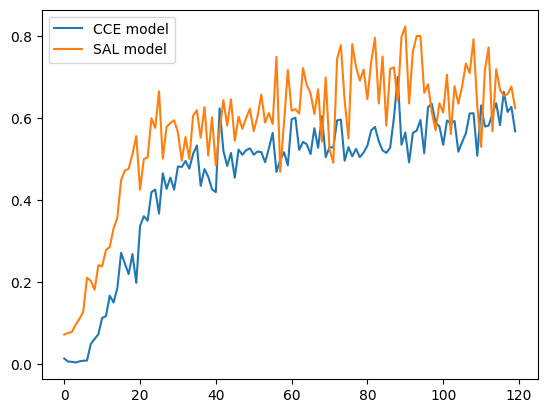

In [47]:
plt.plot(get_cce_error(bike_only_cce), label="CCE model")
plt.plot(get_cce_error(bike_only_sal), label="SAL model")
plt.legend()
plt.show()